In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import sklearn
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
C:\Users\Tom\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Tom\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Tom\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Tom\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Fu

In [4]:
ion = 'Cl mg/l'
features = 'new_features7.xlsx'

In [5]:
#-----Import the Excel as Dataframe
df1 = pd.read_excel(features,header = 0 ,index_col = 0,skiprows = [i for i in range(1,937)])
df2 = pd.read_excel('UHF.xlsx', header = 0, index_col = 0, skiprows = [i for i in range(1,937)], skip_blanks_lines = False,usecols = ['ID',ion])

In [6]:
#-----Interpolate the ion value with linear interpolation to fill the missing ones
df2.interpolate(inplace = True)

In [7]:
def min_max_normalization(array):
    return (array - array.min())/(array.max()-array.min())

Normalize the feature values and the exact values

In [8]:
for i in range(7):
    df1.values[:,i] = min_max_normalization(df1.values[:,i])
df2.values[:,0] = min_max_normalization(df2.values[:,0])

Split the data into a training set and a test set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2,random_state = 0)

Initialise the neural network, fit with our training set and then compute the prediction with the test set


Epoch 1/200
1151/1151 [==============================] - 1s 467us/step - loss: 0.0468
Epoch 2/200
1151/1151 [==============================] - 0s 388us/step - loss: 0.0030
Epoch 3/200
1151/1151 [==============================] - 0s 345us/step - loss: 0.0019
Epoch 4/200
1151/1151 [==============================] - 0s 248us/step - loss: 0.0017
Epoch 5/200
1151/1151 [==============================] - 1s 521us/step - loss: 0.0015
Epoch 6/200
1151/1151 [==============================] - 1s 464us/step - loss: 0.0014
Epoch 7/200
1151/1151 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 8/200
1151/1151 [==============================] - 0s 169us/step - loss: 0.0013
Epoch 9/200
1151/1151 [==============================] - 0s 262us/step - loss: 0.0011
Epoch 10/200
1151/1151 [==============================] - 0s 164us/step - loss: 0.0011
Epoch 11/200
1151/1151 [==============================] - 0s 232us/step - loss: 0.0010
Epoch 12/200
1151/1151 [===========================

1151/1151 [==============================] - 0s 157us/step - loss: 5.6075e-04
Epoch 90/200
1151/1151 [==============================] - 0s 103us/step - loss: 6.1491e-04
Epoch 91/200
1151/1151 [==============================] - 0s 105us/step - loss: 6.6682e-04
Epoch 92/200
1151/1151 [==============================] - 0s 104us/step - loss: 6.4248e-04
Epoch 93/200
1151/1151 [==============================] - 0s 107us/step - loss: 6.6948e-04
Epoch 94/200
1151/1151 [==============================] - 0s 113us/step - loss: 5.6819e-04
Epoch 95/200
1151/1151 [==============================] - 0s 114us/step - loss: 5.8018e-04
Epoch 96/200
1151/1151 [==============================] - 0s 167us/step - loss: 5.7441e-04
Epoch 97/200
1151/1151 [==============================] - 0s 295us/step - loss: 5.5809e-04
Epoch 98/200
1151/1151 [==============================] - 0s 434us/step - loss: 6.2211e-04
Epoch 99/200
1151/1151 [==============================] - 0s 370us/step - loss: 5.7435e-04
Epoch 100/20

1151/1151 [==============================] - 0s 161us/step - loss: 5.0642e-04
Epoch 179/200
1151/1151 [==============================] - 0s 169us/step - loss: 5.7155e-04
Epoch 180/200
1151/1151 [==============================] - 0s 162us/step - loss: 5.3025e-04
Epoch 181/200
1151/1151 [==============================] - 0s 139us/step - loss: 5.8402e-04
Epoch 182/200
1151/1151 [==============================] - 0s 144us/step - loss: 5.6862e-04
Epoch 183/200
1151/1151 [==============================] - 0s 160us/step - loss: 5.2369e-04
Epoch 184/200
1151/1151 [==============================] - 0s 170us/step - loss: 5.1600e-04
Epoch 185/200
1151/1151 [==============================] - 0s 131us/step - loss: 5.0905e-04
Epoch 186/200
1151/1151 [==============================] - 0s 143us/step - loss: 5.7138e-04
Epoch 187/200
1151/1151 [==============================] - 0s 136us/step - loss: 5.3767e-04
Epoch 188/200
1151/1151 [==============================] - 0s 126us/step - loss: 5.1111e-04
Ep

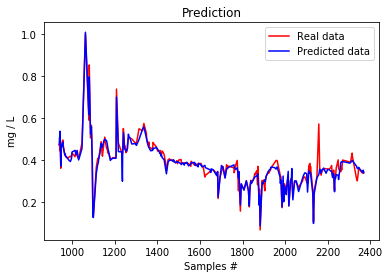

In [10]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 7))

# Adding the second hidden layer
model.add(Dense(units = 16, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 8, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))


X_train = X_train.sort_index()
y_train = y_train.sort_index()

model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(X_train, y_train, batch_size = 10, epochs = 200)

X_test.sort_index()
index = X_test.index
y_pred = model.predict(X_test)
y_prime = DataFrame(y_pred,index)
y_prime = y_prime.sort_index()


y_test = y_test.sort_index()
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_prime, color = 'blue', label = 'Predicted data')
plt.ylabel('mg / L')
plt.xlabel('Samples #')
plt.title('Prediction')
plt.legend()
plt.show()

In [91]:
#----Compute the absolute mean difference between two arrays
def compute_diff(y_prime,y):
    ecart = 0
    for i in range(len(y_prime)):
        ecart += abs(y_prime[i]-y[i])
    mean = ecart /  len(y_prime)
    return mean

Compute the difference between the computed values and the exact ones

In [92]:
compute_diff(y_prime.values.flatten(),y_test.values.flatten())

0.016102486120932173